# 模型结果展示

# 引入库

In [1]:
import infer, infer_lstm, infer_linear, infer_lstm_v2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy

In [2]:
def get_min_ade_fde(metrics, key='ade'):
    min_ade = 100000
    for i in range(len(metrics[key])):
        if metrics[key][i] < min_ade:
            min_ade = metrics['ade'][i]
            min_fde = metrics['fde'][i]

    return min_ade, min_fde

In [3]:
# const
color_list = ['y', 'c', 'm', 'k', 'b']
marker_list = ['x', '+', '1', '|', 'v']

lat_min, lat_field, long_min, long_field, alt_min, alt_field = 3.1933607061071148,50.80410785495143,78.42022293891259,56.574887353137626,10599.32828794153,33135.2479876838

china_with_normal_parm = {
    'lat_min': 3.1933607061071148,
    'lat_field': 56.80018735854687,
    'long_min': 70.1073857229127,
    'long_field': 69.8803146893142,
    'alt_min': 0.0,
    'alt_field': 124400.0
}

asia2_param = {
    'lat_min': 31.76517870603203,
    'lat_field': 30.6685328612335,
    'long_min': 0.0011910893405788006,
    'long_field': 92.92122684765502,
    'alt_min':  -148.43954285828946,
    'alt_field': 45148.43954285829
}

asia3_param = {
    'lat_min': 30.395783270172892,
    'lat_field': 31.74846699181365,
    'long_min': 0.0011910893405788006,
    'long_field': 92.97109229168149,
    'alt_min':  -244.67804793347213,
    'alt_field': 45269.67804793347
}

In [4]:
# lat_min, lat_field, long_min, long_field, alt_min, alt_field = 3.1933607061071148,50.80615587860828,78.42022293891259,56.574887353137626,0.0,43734.576275625324
def process_normal(traj_data, normal_parm):
    traj_data[:, :, 0] = traj_data[:, : ,0] * normal_parm['lat_field'] + normal_parm['lat_min']

    traj_data[:, :, 1] = traj_data[:, : ,1] * normal_parm['long_field'] + normal_parm['long_min']
   
    traj_data[:, :, 2] = traj_data[:, : , 2] * normal_parm['alt_field'] + normal_parm['alt_min']
    
    return traj_data

def show_t(obs_traj, pred_traj_gt, predictions, datasets):
    
    if (datasets == 'china_with_normal'):
        param = china_with_normal_parm
    elif datasets == 'asia2':
        param = asia2_param
    elif datasets == 'asia3':
        param = asia3_param
    
    obs_traj = process_normal(obs_traj, param)
    pred_traj_gt = process_normal(pred_traj_gt, param)
    
    for i in range(len(predictions)):
        predictions[i][0] = process_normal(predictions[i][0], param)
        predictions[i][0] = numpy.concatenate((numpy.expand_dims(obs_traj[-1, :, :], axis=0), predictions[i][0]), axis=0)
        
    pred_traj_gt = numpy.concatenate((numpy.expand_dims(obs_traj[-1, :, :], axis=0), pred_traj_gt), axis=0)
   
    fig = plt.figure()
    ax = Axes3D(fig)
    line_width = 1
    marker_size = 3
    
    ax.plot(obs_traj[:, 0, 0], obs_traj[:, 0, 1], obs_traj[:, 0, 2], color='r', label='input', linewidth=line_width)
    ax.plot(pred_traj_gt[:, 0, 0], pred_traj_gt[:, 0, 1], pred_traj_gt[:, 0, 2], color='g', label='groudtruth', linewidth=line_width, marker='D', markersize=marker_size)

    result_text = ''
    for i in range(len(predictions)):
        (prediction, ade, fde, label) = predictions[i]
        # print('%s len is %d' % (label, len(prediction)))
        ax.plot(prediction[:, 0, 0], prediction[:, 0, 1], prediction[:, 0, 2], color=color_list[i], label=label, linewidth=line_width, marker=marker_list[i], markersize=marker_size)
        result_text = result_text + '%s ade  = %f    %s fde = %f\n' % (label, ade, label, fde)

    plt.title(result_text, y=-0.2)

    ax.legend()
    plt.show()
    # plt.legend()

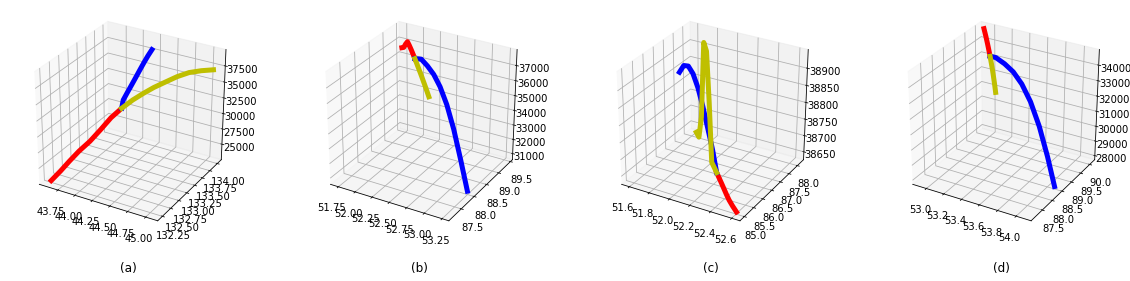

In [94]:
fig = plt.figure(figsize=(20, 4.2))
title = ['(a)', '(b)', '(c)', '(d)']

for i in range(4):
    obs_traj, pred_traj_fake, pred_traj_gt = infer1.infer()
    ax = fig.add_subplot(1, 4, i + 1, projection='3d')
    show_t(obs_traj, pred_traj_fake, pred_traj_gt, ax)
    plt.title(title[i], y=-0.2)

plt.show()

# 不同模型在china_with_normal上比较
## 1. 载入模型

In [4]:
# Linear模型
linear_infer = infer_linear.Infer(use_cuda=1)
linear_infer.load_model('models/china_with_normal_linear_1_with_model.pt')

# LSTM模型
lstm_infer = infer_lstm.Infer(use_cuda=1)
lstm_infer.load_model('models/china_with_normal_lstm_2_with_model.pt')


# LSTM_V2模型
lstm_v2_infer = infer_lstm_v2.Infer(use_cuda=1)
lstm_v2_infer.load_model('models/china_with_normal_lstmV2_1/china_with_normal_lstm_v2_with_model.pt')

# china_with_normal_tGAN_4模型
china_with_normal_tGAN_4_infer = infer.Infer(use_cuda=1)
china_with_normal_tGAN_4_infer.load_model('china_with_normal_tgan_4_with_model.pt')

[ 302.  367.  438. ... 8963. 4246. 6694.]
[ 372.  372.  372. ... 8856. 8939. 8939.]
[ 302.  367.  438. ... 8963. 4246. 6694.]
[ 372.  372.  372. ... 8856. 8939. 8939.]
[ 302.  367.  438. ... 8963. 4246. 6694.]
[ 372.  372.  372. ... 8856. 8939. 8939.]


## 2. 查看各个模型的指标

In [7]:
# _, metrics = china_with_normal_tGAN_4_infer.get_accuracy()
# min_ade, min_fde = get_min_ade_fde(metrics)
# print('china_with_normal_tGAN_4 ade is %f' % min_ade)
# print('china_with_normal_tGAN_4 fde is %f' % min_fde)

metrics = linear_infer.check_accuracy('test', limit=True)
print('linear test ade is %f' % metrics['ade'])
print('linear test fde is %f' % metrics['fde'])

metrics = lstm_infer.check_accuracy('test', limit=True)
print('lstm test ade is %f' % metrics['ade'])
print('lstm test fde is %f' % metrics['fde'])

metrics = lstm_v2_infer.check_accuracy('test', limit=True)
print('lstm_v2 test ade is %f' % metrics['ade'])
print('lstm_v2 test fde is %f' % metrics['fde'])

metrics = china_with_normal_tGAN_4_infer.check_accuracy('test', limit=True)
print('china_with_normal_tGAN_4 test ade is %f' % metrics['ade'])
print('china_with_normal_tGAN_4 test fde is %f' % metrics['fde'])

linear test ade is 0.037163
linear test fde is 0.036657
lstm test ade is 0.011780
lstm test fde is 0.007869
lstm_v2 test ade is 0.005552
lstm_v2 test fde is 0.007153
china_with_normal_tGAN_4 test ade is 0.003902
china_with_normal_tGAN_4 test fde is 0.007316


## 3. 实际效果的测试

In [18]:
# 获取一条数据
obs_traj, pred_traj_gt, obs_traj_rel, seq_start_end = china_with_normal_tGAN_4_infer.get_one_data()

In [19]:
predictions = []

# linear_pred, linear_ade, linear_fde = linear_infer.predict(obs_traj, pred_traj_gt)

lstm_v2_pred, lstm_v2_ade, lstm_v2_fde = lstm_v2_infer.predict(obs_traj, pred_traj_gt)
predictions.append([lstm_v2_pred, lstm_v2_ade, lstm_v2_fde, 'lstm_v2'])


# tgan2_pred, tgan2_ade, tgan2_fde = tgan_infer_2.predict(obs_traj, pred_traj_gt, obs_traj_rel, seq_start_end)
# prediction.append([tgan2_pred, tgan2_ade, tgan2_fde, 'tgan2'])

tgan2_pred, tgan2_ade, tgan2_fde = china_with_normal_tGAN_2_infer.predict(obs_traj, pred_traj_gt, obs_traj_rel, seq_start_end)
predictions.append([tgan2_pred, tgan2_ade, tgan2_fde, 'china_with_normal_tGAN_2'])

# tgan3_pred, tgan3_ade, tgan3_fde = china_with_normal_tGAN_3_infer.predict(obs_traj, pred_traj_gt, obs_traj_rel, seq_start_end)
# predictions.append([tgan3_pred, tgan3_ade, tgan3_fde, 'china_with_normal_tGAN_3'])

tgan3_pred, tgan3_ade, tgan3_fde = china_with_normal_tGAN_4_infer.predict(obs_traj, pred_traj_gt, obs_traj_rel, seq_start_end)
predictions.append([tgan3_pred, tgan3_ade, tgan3_fde, 'china_with_normal_tGAN_4'])

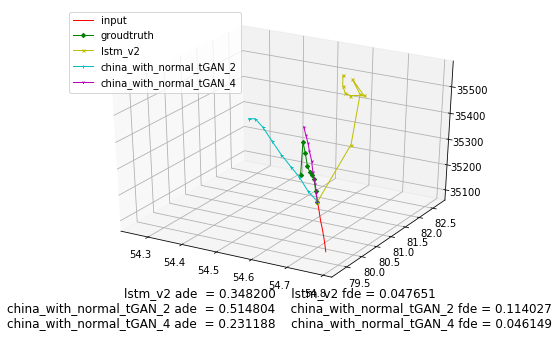

In [20]:
obs_traj = obs_traj.cpu().detach().numpy()
pred_traj_gt = pred_traj_gt.cpu().detach().numpy()

show_t(obs_traj, pred_traj_gt, predictions)

array(0.14459205, dtype=float32)

# 不同阶段模型的比较
## 1. 载入模型

In [5]:
# china_with_normal_tGAN_4模型
all_infer = infer.Infer(use_cuda=1)
all_infer.load_model('models/asia4_tgan_2/asia4_tgan_2_with_model.pt')

# china_with_normal_take_off_tGAN_4模型
take_off_infer = infer.Infer(use_cuda=1)
take_off_infer.load_model('models/asia4_takeoff_tgan_1/asia4_takeoff_tgan_1_with_model.pt')

# china_with_normal_smooth_tGAN_4模型
smooth_infer = infer.Infer(use_cuda=1)
smooth_infer.load_model('models/asia4_smooth_tgan_1/asia4_smooth_tgan_1_with_model.pt')

/home/cjzy/.conda/envs/traj/lib/python3.7/site-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


## 2. 查看各个模型的指标

In [6]:
metrics = all_infer.check_accuracy('test', limit=True)
print('all test ade is %f' % metrics['ade'])
print('all test fde is %f' % metrics['fde'])

metrics = take_off_infer.check_accuracy('test', limit=True)
print('take off test ade is %f' % metrics['ade'])
print('take off test fde is %f' % metrics['fde'])

metrics = smooth_infer.check_accuracy('test', limit=True)
print('smooth test ade is %f' % metrics['ade'])
print('smooth test fde is %f' % metrics['fde'])

all test ade is 0.025590
all test fde is 0.050710
take off test ade is 0.043148
take off test fde is 0.070711
smooth test ade is 0.010187
smooth test fde is 0.022604


## 3. 查看模型在不同数据集上的指标

In [7]:
all_test_loader = all_infer.get_loader(loader_type='test')

take_off_test_loader = take_off_infer.get_loader(loader_type='test')

smooth_test_loader = smooth_infer.get_loader(loader_type='test')

In [8]:
metrics = all_infer.check_accuracy('spec', loader=take_off_test_loader, limit=True)
print('all in take off ade is %f' % metrics['ade'])
print('all in take off fde is %f' % metrics['fde'])

metrics = all_infer.check_accuracy('spec', loader=smooth_test_loader, limit=True)
print('all in smooth ade is %f' % metrics['ade'])
print('all in smooth fde is %f' % metrics['fde'])

metrics = take_off_infer.check_accuracy('spec', loader=all_test_loader, limit=True)
print('take off in all ade is %f' % metrics['ade'])
print('take off in all fde is %f' % metrics['fde'])

metrics = take_off_infer.check_accuracy('spec', loader=smooth_test_loader, limit=True)
print('take off in smooth ade is %f' % metrics['ade'])
print('take off in?> smooth fde is %f' % metrics['fde']) 
metrics = smooth_infer.check_accuracy('spec', loader=all_test_loader, limit=True)
print('smooth in all ade is %f' % metrics['ade'])
print('smooth in all fde is %f' % metrics['fde'])

metrics = smooth_infer.check_accuracy('spec', loader=take_off_test_loader, limit=True)
print('smooth in takeoff ade is %f' % metrics['ade'])
print('smooth in takeoff fde is %f' % metrics['fde'])

all in take off ade is 0.041540
all in take off fde is 0.068989
all in smooth ade is 0.014438
all in smooth fde is 0.034450
take off in all ade is 0.095882
take off in all fde is 0.199106
take off in smooth ade is 0.133945
take off in smooth fde is 0.284940
smooth in all ade is 0.043402
smooth in all fde is 0.086440
smooth in takeoff ade is 0.084976
smooth in takeoff fde is 0.155618


# 查看单个模型的表现以及数据

## 1. 载入模型

In [5]:
# asia_tgan_1模型
sigle_one = infer.Infer(use_cuda=1)
sigle_one.load_model('models/asia2_tgan_4/asia2_tgan_4_with_model.pt')

metrics = sigle_one.check_accuracy('test', limit=True)
print('test ade is %f' % metrics['ade'])
print('test fde is %f' % metrics['fde'])

print('')
metrics = sigle_one.check_accuracy('train', limit=True)
print('train ade is %f' % metrics['ade'])
print('train fde is %f' % metrics['fde'])

/home/cjzy/.conda/envs/traj/lib/python3.7/site-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


test ade is 0.022321
test fde is 0.044375

train ade is 0.018593
train fde is 0.036007


In [25]:
# 获取一条数据
obs_traj, pred_traj_gt, obs_traj_rel, seq_start_end = sigle_one.get_one_data()

predictions = []

tgan3_pred, tgan3_ade, tgan3_fde = sigle_one.predict(obs_traj, pred_traj_gt, obs_traj_rel, seq_start_end)
predictions.append([tgan3_pred, tgan3_ade, tgan3_fde, 'sigle_one'])

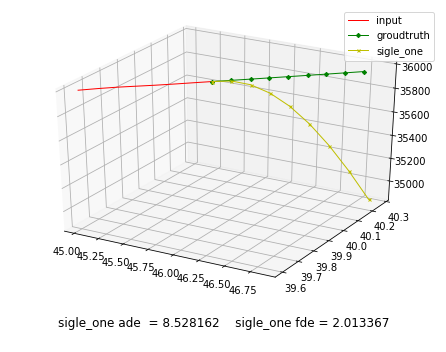

In [26]:
obs_traj = obs_traj.cpu().detach().numpy()
pred_traj_gt = pred_traj_gt.cpu().detach().numpy()

show_t(obs_traj, pred_traj_gt, predictions, 'asia2')